## Unsupervised Learning

### 1. Introduction to Unsupervised Learning

Unsupervised Learning: Learning patterns from unlabeled data.
Common tasks: Clustering, Dimensionality Reduction, Anomaly Detection, Association Rule Mining.

#### 2. Customer Segmentation using Clustering
Grouping customers based on shared characteristics like demographics, behavior, or psychographic

Dataset: Mall Customer Segmentation

Source: Kaggle - https://www.kaggle.com/datasets/uciml/autompg-dataset/data

Description: Contains information about mall customers including their age, annual income, and spending score.

Objective: Discover natural groupings (segments) of customers based on their features.

#### 3. Using K-Means Clustering.

In [1]:
# environment set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data loading
df = pd.read_csv('Mall_Customers.csv')

In [3]:
display(df.head(), df.tail())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

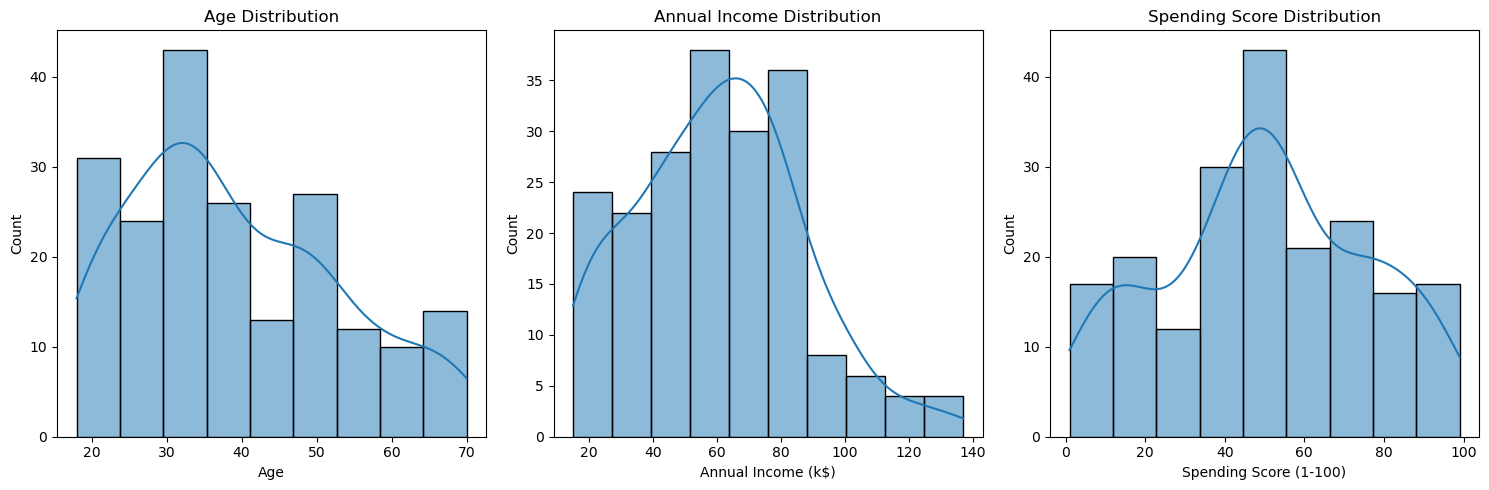

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

#### 4. Data Preprocessing

In [8]:
# feature selection for clustering
# We'll focus on 'Annual Income (k$)' and 'Spending Score (1-100)' for initial visualization,
# but the preprocessor will handle all relevant features.
features_for_clustering = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features_for_clustering]

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('gender_onehot', OneHotEncoder(handle_unknown='ignore'), ['Gender']),
        ('num_scaler', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
    ],
    remainder='passthrough'
)
# apply preprocessing
X_processed = preprocessor.fit_transform(X)

In [21]:
print("\nShape of Processed Data")
print(X_processed.shape)
print("Processed data (first 5 rows):\n", X_processed[:5])


Shape of Processed Data
(200, 5)
Processed data (first 5 rows):
 [[ 0.          1.         -1.42456879 -1.73899919 -0.43480148]
 [ 0.          1.         -1.28103541 -1.73899919  1.19570407]
 [ 1.          0.         -1.3528021  -1.70082976 -1.71591298]
 [ 1.          0.         -1.13750203 -1.70082976  1.04041783]
 [ 1.          0.         -0.56336851 -1.66266033 -0.39597992]]


#### 5. K-Means clustering

In [12]:
# Determining the optimal number of clusters using the Elbow Method
wcss = [] # Within-Cluster Sum of Squares
max_k = 10 # test up to 10 clusters

for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init for robust initialization
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

  File "C:\Users\kavum\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kavum\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kavum\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kavum\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


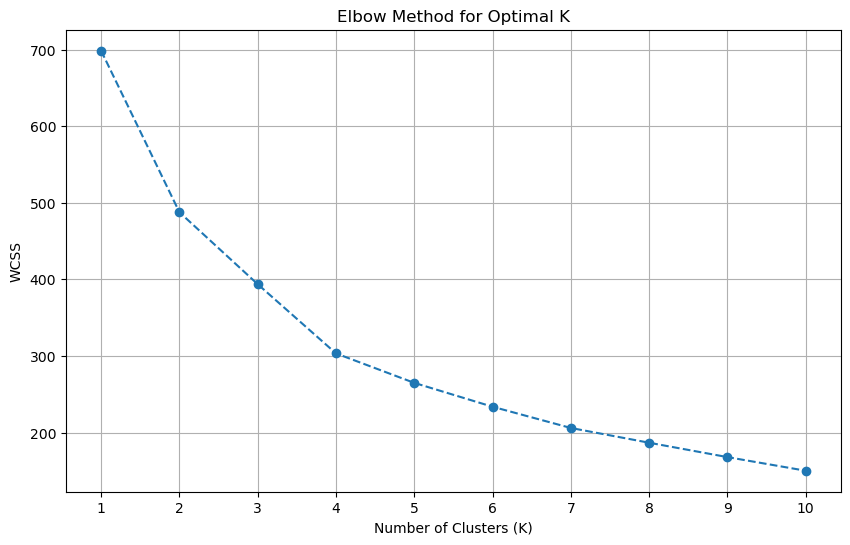

In [13]:
# elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [22]:
# based on the elbow method, let's choose k=4
optimal_k = 4
print(f"\nChoosing optimal number of clusters (k) = {optimal_k}")


Choosing optimal number of clusters (k) = 4


In [23]:
# apply K-Means with the chosen k
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X_processed)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [24]:
# visualizing clusters
# analyze cluster characteristics
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.661538           47.600000               40.446154
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.921053           86.684211               18.763158


In [25]:
# gender distribution per cluster
gender_distribution = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
print("\n--- Gender Distribution per Cluster ---")
print(gender_distribution)


--- Gender Distribution per Cluster ---
Gender     Female      Male
Cluster                    
0        0.584615  0.415385
1        0.550000  0.450000
2        0.596491  0.403509
3        0.473684  0.526316


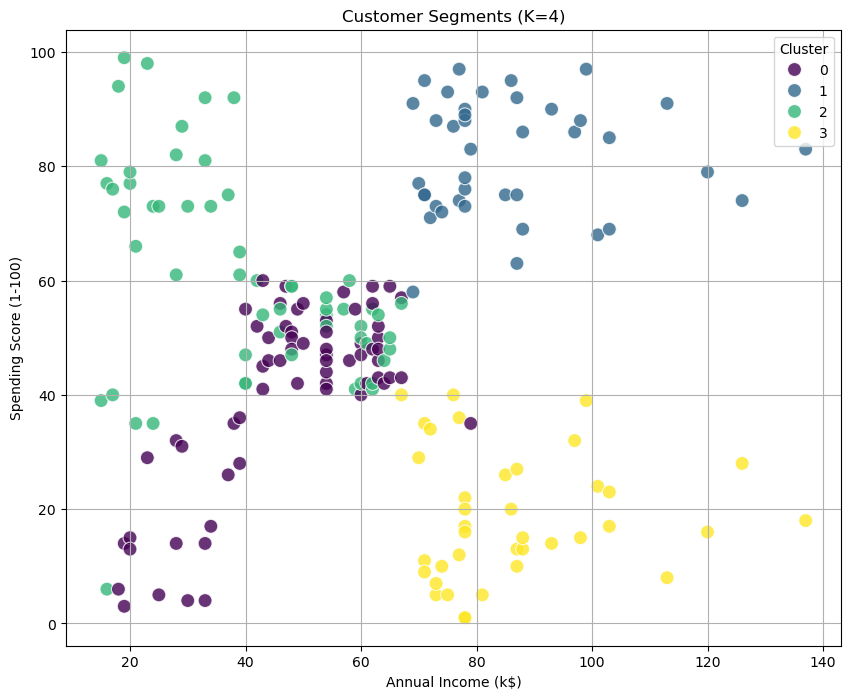

In [26]:
# visualizing the clusters using Annual Income and Spending Score for 2D plot, a common visualization as these two features often separate the clusters well.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

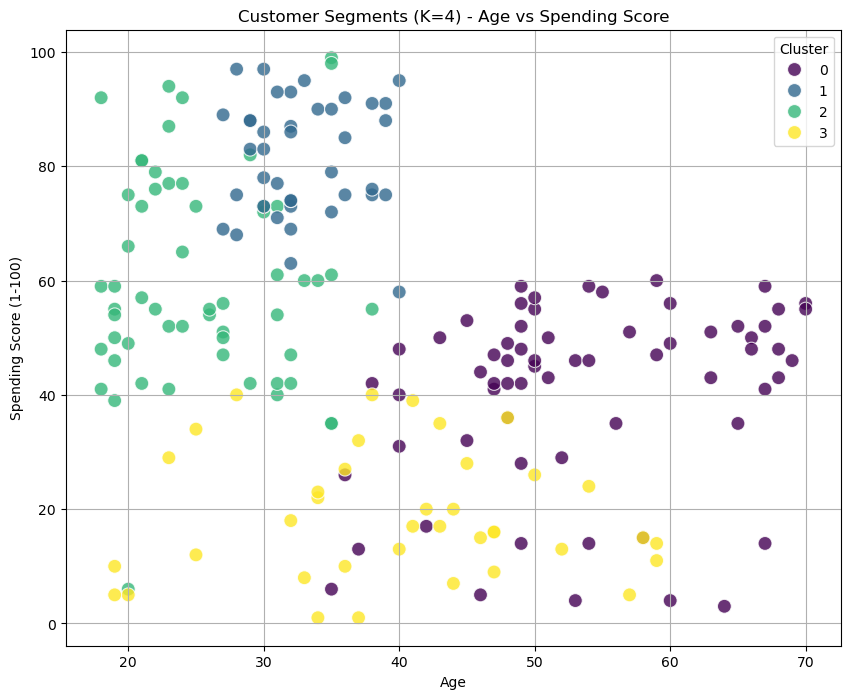

In [27]:
# visualize clusters with age and spending score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Customer Segments (K={optimal_k}) - Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()